### gender recognization using eyes photosets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
# here we have import all the required libraries for datareading

In [3]:
path1=r"d:\eyes"
categiry=['maleeyes','femaleeyes']

In [4]:
# we have decleared the path for os to follow

In [5]:
for i in categiry:
    print(categiry.index(i))
    

0
1


In [6]:
 # we have set targets as 0 for maleeye,1 for femaleeye

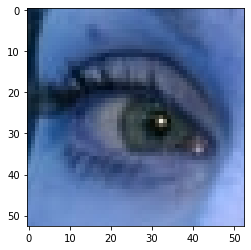

In [7]:
for i in categiry:
    path2=os.path.join(path1,i)
    path3=os.listdir(path2)
    for img in path3:
        img_path=os.path.join(path2,img)
        img_array=cv2.imread(img_path)
        plt.imshow(img_array)
        break
        #print(img_path)
        

In [8]:
# here we could actually read the sample image stored in d_drive 

In [9]:
final_img=[]
for i in categiry:
    target=categiry.index(i)
    path2=os.path.join(path1,i)
    path3=os.listdir(path2)
    for img in path3:
        img_path=os.path.join(path2,img)
        img_array=cv2.imread(img_path)
        final_array=cv2.resize(img_array,(50,50))
        final_img.append([final_array,target])
        
        #plt.imshow(img_array)
        
        
        

In [10]:
# in the above this step we have converted the image to array of pixels using cv2 library and converted all 
# the images of varying size to one fix size of (50*50). then we have appended array and target in final_img list
 

In [11]:
final_img[0]

[array([[[248, 242, 237],
         [247, 240, 236],
         [247, 240, 239],
         ...,
         [254, 254, 254],
         [255, 255, 255],
         [254, 254, 254]],
 
        [[250, 243, 238],
         [248, 241, 237],
         [245, 237, 234],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[246, 238, 232],
         [250, 241, 236],
         [247, 238, 235],
         ...,
         [255, 255, 255],
         [254, 254, 254],
         [254, 254, 254]],
 
        ...,
 
        [[255, 254, 255],
         [254, 253, 254],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [12]:
# from above we can conform array and target have been set

In [13]:
import numpy as np
shuffle_array=np.random.shuffle(final_img)

In [14]:
# but all the recored were in seqence of all male initially  and then all female 
#  so we have performed random shuffling 

In [15]:
x=[]
y=[]
for array,target in final_img:
    x.append(array)
    y.append(target)

In [16]:
# here we have seperated all arrays in x and all targets in y

In [17]:
x=np.array(x)
y=np.array(y)

In [18]:
x=x/255

In [19]:
# here we have carried out normalization of x

In [20]:
x.shape

(11525, 50, 50, 3)

In [21]:
### now data is ready for model building 

In [22]:
x_train=x[0:8500]

In [23]:
y_train=y[0:8500]

In [24]:
x_test=x[8500:]

In [25]:
y_test=y[8500:]

In [26]:
# we have spitted our data in trainning sets and testing sets

In [27]:
import tensorflow as tf
import keras 

In [28]:
# we have imported required libraries for model initialization

In [29]:
model=tf.keras.models.Sequential()


In [30]:
model.add(tf.keras.layers.Conv2D(filters=24,kernel_size=(5,5),activation='relu',padding='same',input_shape=x.shape[1:]))
#model.add(Max_Pool_2D(pool_size=(2,2)))
tf.keras.layers.MaxPool2D(pool_size=(3,3))

model.add(tf.keras.layers.Flatten())

In [31]:
# midel is initialized and here we have added all required layers
# 1) first layer is convocutional layer with no 24 no of kerenals and kerenal size is (5*5). we have used activation function as relu and input shape is given
# 2)output of convocutional layer is given as input for poolar layer and we have used Maxpooling with the shape of (3*3) which is aslo an hyperparameter 
#3) in the third layer, we have converted output of maxpoolar layer(i.e matrix) to input for hidden layer by flattening the matrix 

In [32]:
model.add(tf.keras.layers.Dense(20,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(20,activation=tf.nn.relu))
#model.add(tf.keras.layers.Dense(90,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2,activation=tf.nn.softmax))

In [33]:
# we have added two hidden layer with dencity of 20 nuron each evry nuron is having activation function as relu
# in output layer we have two nurons and activation function we have used is softmax which is usefull for output prediction

In [34]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
# here we have compile the model with optimizer as adam and we have calculated the loss using crossentropy

In [36]:
model.fit(x_train,y_train,batch_size=32,epochs=10,validation_split=0.2)

Epoch 1/10
213/213 [==============================] - 45s 193ms/step - loss: 0.5425 - accuracy: 0.7365 - val_loss: 0.3722 - val_accuracy: 0.8353
Epoch 2/10
213/213 [==============================] - 38s 181ms/step - loss: 0.3751 - accuracy: 0.8407 - val_loss: 0.4124 - val_accuracy: 0.8241
Epoch 3/10
213/213 [==============================] - 44s 206ms/step - loss: 0.3260 - accuracy: 0.8618 - val_loss: 0.3690 - val_accuracy: 0.8382
Epoch 4/10
213/213 [==============================] - 47s 222ms/step - loss: 0.2971 - accuracy: 0.8735 - val_loss: 0.3926 - val_accuracy: 0.8335
Epoch 5/10
213/213 [==============================] - 41s 192ms/step - loss: 0.2718 - accuracy: 0.8831 - val_loss: 0.3605 - val_accuracy: 0.8453
Epoch 6/10
213/213 [==============================] - 42s 198ms/step - loss: 0.2587 - accuracy: 0.8934 - val_loss: 0.3098 - val_accuracy: 0.8724
Epoch 7/10
213/213 [==============================] - 40s 187ms/step - loss: 0.2396 - accuracy: 0.9043 - val_loss: 0.3979 - val_ac

In [37]:
# now model is trained on trannind datasets and validated on validation dataset

In [38]:
y_pred=model.predict(x_test)

95/95 [==============================] - 6s 60ms/step


In [39]:
# here we carried out prediction on testing dataset

In [40]:
y_pred

array([[0.9737327 , 0.02626728],
       [0.02911377, 0.9708862 ],
       [0.9964569 , 0.00354304],
       ...,
       [0.53385574, 0.46614417],
       [0.00211408, 0.9978859 ],
       [0.00302146, 0.9969785 ]], dtype=float32)

In [41]:
final_pred=np.argmax(y_pred,axis=1)
#final_pred


In [42]:
final_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test,final_pred)

array([[1442,  175],
       [ 162, 1246]], dtype=int64)

In [45]:
from sklearn import metrics

In [46]:
metrics.accuracy_score(y_test,final_pred)

0.888595041322314

In [47]:
model.save('gender_prediction_using_eyes.h5')

In [49]:
pwd

'D:\\'

In [50]:
from keras.models import load_model

In [51]:
eye_model=load_model('gender_prediction_using_eyes.h5')